In [1157]:
import pandas as pd
import numpy as np
from plotnine import *
import re

import folium
from folium import Marker, Icon, CircleMarker

park = pd.read_csv('전국도시공원정보표준데이터.csv',encoding='euc-kr')
park.shape

(18481, 19)

In [1158]:
park.head(3)

c:\Users\82102\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,27140-00069,율하체육공원,체육공원,NaN,대구광역시 동구 율하동 1626,35.859925,128.692838,187515.0,NaN,NaN,NaN,NaN,NaN,2003-12-24,대구광역시 동구청,053-662-2860,2021-09-01,6270000,대구광역시
1,27260-00037,대구체육공원,체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,1288164.0,"대구스타디움, 육상진흥센터",NaN,"주차장, 매점",NaN,스포츠기념관,1996-05-11,대구광역시 수성구청,053-666-2850,2021-09-01,6270000,대구광역시
2,27290-00175,월배체육공원,체육공원,NaN,대구광역시 달서구 도원동 1473,35.801600,128.536496,36061.0,NaN,NaN,NaN,NaN,NaN,2009-12-04,대구광역시 달서구청,053-667-2850,2021-09-01,6270000,대구광역시


In [1159]:
#열 확인
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [1160]:
#null값 개수
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        12816
소재지지번주소           781
위도                459
경도                473
공원면적                0
공원보유시설(운동시설)    13574
공원보유시설(유희시설)    12138
공원보유시설(편익시설)    13190
공원보유시설(교양시설)    17514
공원보유시설(기타시설)    15914
지정고시일            2871
관리기관명             980
전화번호             1906
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

c:\Users\82102\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 594 rows containing missing values.


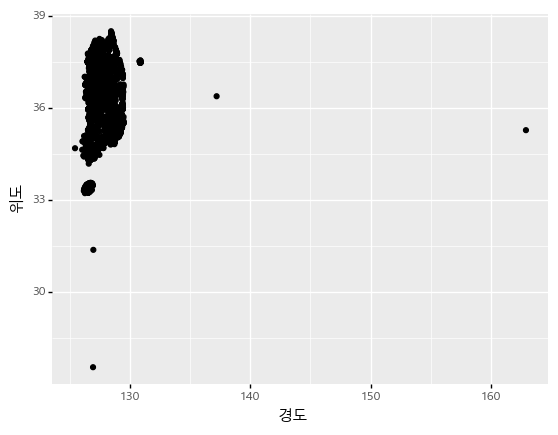

<ggplot: (116130135347)>

In [1161]:
#위도 경도 유효하지 않는 값을 확인하기 위해, 위도 경도 위치 찍기
#한글인식이 안되서 텍스트패밀리 명시 필요
(ggplot(park)
 +aes(x='경도',y='위도')
 +geom_point()
 +theme(text=element_text(family='Malgun Gothic'))
 )

In [1162]:
#불필요한 columns제거
park.drop(columns=['데이터기준일자','제공기관코드','제공기관명','공원면적','전화번호','공원구분','공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
        '공원보유시설(기타시설)', '지정고시일', '관리기관명'],inplace=True)
park.shape

(18481, 6)

In [1163]:
#데이터타입 확인
park.dtypes

관리번호         object
공원명          object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
dtype: object

In [1164]:
#null값 개수 확인
park['소재지도로명주소'].isnull().sum()
park['소재지지번주소'].isnull().sum()

781

In [1165]:
#소재지도로명주소가 null값인 행과 소재지번주소가 null이 아닌 행 조회
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())].shape

(12816, 6)

In [1166]:
#소재지도로명주소가 결측값일 때, 소재지지번주소로 대체
park['소재지도로명주소'].fillna(park['소재지지번주소'],inplace=True)
park['소재지도로명주소'].isnull().sum()

0

In [1167]:
park_loc= park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())]
park_loc.shape

(0, 6)

In [1168]:
#소재지도로명주소에서 시도 추출
park['시도'] = park['소재지도로명주소'].str.split(' ',expand=True)[0]
park.head(3)

,관리번호,공원명,소재지도로명주소,소재지지번주소,위도,경도,시도
0,27140-00069,율하체육공원,대구광역시 동구 율하동 1626,대구광역시 동구 율하동 1626,35.859925,128.692838,대구광역시
1,27260-00037,대구체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,대구광역시
2,27290-00175,월배체육공원,대구광역시 달서구 도원동 1473,대구광역시 달서구 도원동 1473,35.801600,128.536496,대구광역시


In [1169]:
#소재지도로명주소에서 구군 추출
park['구군'] = park['소재지도로명주소'].str.split(' ',expand=True)[1]
park.head(3)

,관리번호,공원명,소재지도로명주소,소재지지번주소,위도,경도,시도,구군
0,27140-00069,율하체육공원,대구광역시 동구 율하동 1626,대구광역시 동구 율하동 1626,35.859925,128.692838,대구광역시,동구
1,27260-00037,대구체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,대구광역시,수성구
2,27290-00175,월배체육공원,대구광역시 달서구 도원동 1473,대구광역시 달서구 도원동 1473,35.801600,128.536496,대구광역시,달서구


In [1170]:
#위도 경도 값 보여주기
park[['위도','경도']].describe()

,위도,경도
count,18022.000000,18008.000000
mean,36.426881,127.476309
std,1.050781,0.891709
min,27.551606,125.432215
25%,35.493571,126.879313
50%,36.609581,127.106818
75%,37.424840,127.945087
max,38.491555,162.920004


In [1171]:
#범위를 벗어나는 위도 경도 값, 시도에서 null값인 데이터 삭제
park_loc_notnull =park.loc[(park['위도'] > 32) & (park['경도'] <132) & park['시도'].notnull()]
park_loc_notnull.shape

(17883, 8)

In [1172]:
#범위 벗어나는 위도 경도 값 제거
park.loc[(park['위도'] < 26) | (park['경도'] >= 132) ]

,관리번호,공원명,소재지도로명주소,소재지지번주소,위도,경도,시도,구군
2726,43113-00080,근린공원5(만수공원),충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,충청북도,청주시
12026,46710-00112,공원-112,전라남도 담양군 대전면 성산리 434-13,전라남도 담양군 대전면 성산리 434-13,35.269633,162.920004,전라남도,담양군


In [1173]:
#시도==서울특별시인 깂만 추출
seoul_park = park.loc[(park['시도'] == '서울특별시')]
#경도 구군에서의 결측값NaN 있는 행 제거
seoul_park[['경도','구군']].dropna()
seoul_park.head(3)

,관리번호,공원명,소재지도로명주소,소재지지번주소,위도,경도,시도,구군
635,11530-00010,삼각어린이공원,서울특별시 구로구 구로동 47,서울특별시 구로구 구로동 47,37.501358,126.892013,서울특별시,구로구
636,11530-00011,구로근린공원,서울특별시 구로구 구로동 102,서울특별시 구로구 구로동 102,37.497483,126.889603,서울특별시,구로구
637,11530-00012,환경어린이공원,서울특별시 구로구 구로동 797-1,서울특별시 구로구 구로동 797-1,37.485022,126.888408,서울특별시,구로구


In [1174]:
park_loc_notnull['시도'].value_counts()

경기도        4108
서울특별시      1773
충청남도       1648
전라남도       1559
경상남도       1070
전라북도       1018
경상북도        930
광주광역시       826
충청북도        800
울산광역시       777
인천광역시       689
부산광역시       687
강원도         610
대구광역시       577
대전광역시       500
제주특별자치도     241
세종특별자치시      70
Name: 시도, dtype: int64

In [1175]:
#서울특별시 내에 위치한 공원들의 데이터 추출
seoul_park = seoul_park[['공원명','위도','경도','구군']]
seoul_park.tail(5)

,공원명,위도,경도,구군
18471,서광,37.475162,126.942644,관악구
18472,도덕,37.469331,126.938168,관악구
18473,남강,37.473461,126.924653,관악구
18474,목화,37.467861,126.942282,관악구
18475,대협,37.474772,126.913364,관악구


In [1176]:
#서울특별시 구별 공원 총 개수
seoul_park['구군'].value_counts()

송파구            159
강서구            139
노원구            137
강남구            134
서초구            114
양천구             96
은평구             90
마포구             84
관악구             76
강동구             74
도봉구             71
중랑구             56
서대문구            54
동작구             52
금천구             52
성북구             50
영등포구            50
성동구             48
구로구             48
강북구             45
동대문구            44
광진구             43
종로구             42
용산구             42
중구              38
은평구진관동           7
은평구구산동           2
성북동              2
면목동              2
은평구진관동13-2,      1
정릉동              1
월계로              1
공릉로59가길          1
노원로              1
동일로              1
동일로227길          1
동일로242라길         1
구로구개봉동           1
월계로45길           1
초안산로1길           1
섬밭로              1
마들로3길            1
공릉로58길           1
한글비석로14길         1
한글비석로8길          1
남가좌동             1
은평구응암동           1
Name: 구군, dtype: int64

In [1177]:
pd.Series(seoul_park.columns)

0    공원명
1     위도
2     경도
3     구군
dtype: object

In [1178]:
#데이터타입 확인
seoul_park.dtypes

공원명     object
위도     float64
경도     float64
구군      object
dtype: object

In [1179]:
#데이터타입 변환
seoul_park = seoul_park.astype({'공원명':'string', '구군':'string'})

In [1180]:
#데이터타입 변환 확인
seoul_park.dtypes

공원명     string
위도     float64
경도     float64
구군      string
dtype: object

In [1181]:
seoul_park.loc[seoul_park['구군']=='강남구'].value_counts

<bound method DataFrame.value_counts of             공원명         위도          경도   구군
3739     도곡근린공원  37.489461  127.044002  강남구
3740   싸리고개근린공원  37.489628  127.036325  강남구
3741    갈매기근린공원  37.531399  127.034537  강남구
3742     도성근린공원  37.500303  127.048832  강남구
12355   도곡단비소공원  37.493899  127.047225  강남구
...         ...        ...         ...  ...
18232      개포공원  37.485329  127.071657  강남구
18233   개포개나리공원  37.485329  127.071657  강남구
18234  개포은행나무공원  37.476030  127.049262  강남구
18236    일원까치공원  37.491890  127.088231  강남구
18237     궁마을공원  37.484831  127.099415  강남구

[134 rows x 4 columns]>

In [1183]:
#결측값 제거
seoul_park = seoul_park.dropna(axis = 0)

In [1184]:
#결측값 제거 확인
display(seoul_park.isnull().sum())

공원명    0
위도     0
경도     0
구군     0
dtype: int64

In [1185]:
#행 보여주기
for row in seoul_park.itertuples():
  print(row)

Pandas(Index=635, 공원명='삼각어린이공원', 위도=37.50135772, 경도=126.8920128, 구군='구로구')
Pandas(Index=636, 공원명='구로근린공원', 위도=37.49748278, 경도=126.8896027, 구군='구로구')
Pandas(Index=637, 공원명='환경어린이공원', 위도=37.48502191, 경도=126.888408, 구군='구로구')
Pandas(Index=638, 공원명='애경어린이공원', 위도=37.500156, 경도=126.8846598, 구군='구로구')
Pandas(Index=639, 공원명='테크노근린공원', 위도=37.50811753, 경도=126.8908707, 구군='구로구')
Pandas(Index=640, 공원명='구로동(다울)소공원', 위도=37.49253575, 경도=126.888217, 구군='구로구')
Pandas(Index=641, 공원명='도레미어린이공원', 위도=37.508017, 경도=126.852322, 구군='구로구')
Pandas(Index=642, 공원명='계남근린공원', 위도=37.509285, 경도=126.850122, 구군='구로구')
Pandas(Index=643, 공원명='고척근린공원', 위도=37.50658242, 경도=126.8532783, 구군='구로구')
Pandas(Index=644, 공원명='골목어린이공원', 위도=37.507017, 경도=126.853545, 구군='구로구')
Pandas(Index=645, 공원명='능골어린이공원', 위도=37.506852, 경도=126.854254, 구군='구로구')
Pandas(Index=646, 공원명='오금어린이공원', 위도=37.505038, 경도=126.866221, 구군='구로구')
Pandas(Index=647, 공원명='덕의근린공원', 위도=37.50702571, 경도=126.8558381, 구군='구로구')
Pandas(Index=648, 공원명='현화소공원', 위도=37.5043241

In [1186]:
#지도의 기본 위도경도 설정
#구군에 따라 마커 색상 변경해서 보여주기
def seoul_map(default_location = [37.509736,126.979494], default_zoom_start= 12) :
  default_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
  
  for row in seoul_park.itertuples():
    공원명,위도,경도,구군 =row[1:]
    if 구군 == '금천구' or 구군 =='영등포구' or 구군 == '강서구' or 구군 =='양천구' or 구군 == '구로구' or 구군 =='동작구' or 구군 == '관악구' :
      folium.Marker(location=[위도,경도],popup=f'<pre>공원명: {공원명}</pre>',icon=Icon(color='green')).add_to(default_map)
    elif 구군 == '강남구'or 구군 == '서초구' or 구군 =='송파구' or 구군 == '강동구':
      folium.Marker(location=[위도,경도],popup=f'<pre>공원명: {공원명}</pre>',icon=Icon(color='darkblue')).add_to(default_map)
    elif 구군 == '광진구' or 구군 == '성동구'or 구군 == '동대문구' or 구군 =='중랑구' or 구군 == '성북구'or 구군 == '강북구' or 구군 =='도봉구' or 구군 == '노원구':
      folium.Marker(location=[위도,경도],popup=f'<pre>공원명: {공원명}</pre>',icon=Icon(color='orange')).add_to(default_map)
    elif 구군 == '용산구' or 구군 == '중구'or 구군 == '종로구' or 구군 =='마포구' or 구군 == '서대문구'or 구군 == '은평구'  :
      folium.Marker(location=[위도,경도],popup=f'<pre>공원명: {공원명}</pre>',icon=Icon(color='beige')).add_to(default_map)
    
  
  default_map.save('우리집근처공원.html')
  return default_map

seoul_map()

In [1187]:
seoul_park['구군'].value_counts

<bound method IndexOpsMixin.value_counts of 635      구로구
636      구로구
637      구로구
638      구로구
639      구로구
        ... 
18471    관악구
18472    관악구
18473    관악구
18474    관악구
18475    관악구
Name: 구군, Length: 1774, dtype: string>